# Install Required Packages

In [1]:
!pip install xgboost
!pip install scikit-learn
!pip install Boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.7 MB/s eta 0:00:00


# Data Visualization and preprocessing

<Axes: xlabel='Label', ylabel='count'>

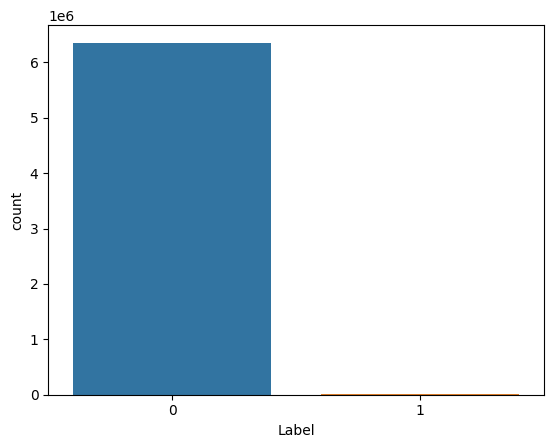

In [107]:
import pandas as pd
import seaborn as sns

# Load data from a CSV file
data = pd.read_csv('/content/drive/MyDrive/ObjectDetectionByVikas/Fraud.csv')

# Rename 'isFraud' column to 'Label'
data = data.rename(columns={'isFraud': 'Label'})


# Sort data by 'step' variable in ascending order
data = data.sort_values(by='step')

# Replace categorical names with numeric codes in the 'type' column
data['type'] = data['type'].replace(
    {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}
)

# Perform normalization on specific columns
columns_to_normalize = ['type','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in columns_to_normalize:
    max_value = data[col].max()
    data[col] /= max_value

# Save the processed data to a new CSV file named 'Processed_Data.csv'
data.to_csv('Processed_Data.csv', index=False)

# Display a count plot of the 'Label' column
sns.countplot(x='Label', data=data)



In [108]:
# Print counts of fraudulent (Label=1) and non-fraudulent (Label=0) transactions
fraudulent_count = data[data['Label'] == 1]['Label'].count()
non_fraudulent_count = data[data['Label'] == 0]['Label'].count()

print(f"Number of fraudulent transactions (Label=1): {fraudulent_count}")
print(f"Number of non-fraudulent transactions (Label=0): {non_fraudulent_count}")

Number of fraudulent transactions (Label=1): 8213
Number of non-fraudulent transactions (Label=0): 6354407


In [113]:
import plotly.express as px
condition = ["No Fraud","Fraud"]

have_or_not = data["Label"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = data["Label"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether transaction is Fraud or not")
fig.show()

In [114]:
# Assuming combinedTransactions is your DataFrame
selected_columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = data[selected_columns]
print(X.shape)
# Get the names of the selected columns
feature_names = X.columns
print(feature_names)

(6362620, 6)
Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [115]:
y=data['Label'].values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=labelencoder.fit_transform(y)

In [116]:
print(Y)
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



[0 0 0 ... 1 1 1]


# Model Training

In [112]:
# fit model to XGBOOST
import xgboost as xgb


# Calculate the ratio of negative (non-fraudulent) to positive (fraudulent) class instances
class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the XGBoost classifier with custom hyperparameters
model = xgb.XGBClassifier(
    learning_rate=0.3,   # Default: 0.3
    n_estimators=120,    # Default: 100
    max_depth=6,         # Default: 6
    min_child_weight=1,  # Default: 1
    gamma=0,             # Default: 0
    subsample=1,         # Default: 1
    colsample_bytree=1,  # Default: 1
    scale_pos_weight=class_ratio
)

# Fit the XGBoost model to the training data
model.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# HyperParameter tuning for the Model (Results)

** n_estimators=120, max_depth=8,lr=0.1  ..........  Accuracy =99.81309586302498 %,Precision = 0.40214098161987477,Recall = 0.9935129740518962,F1-Score = 0.5725377426312006 ROC-AUC = 0.9996476293961508,Optimal Threshold = 0.96,Total Cost = 126400
False Positives = 694,False Negatives = 57.

** n_estimators=150, max_depth=15,lr=0.1 ........... Accuracy =  99.9448654799438 %,Precision = 0.7016100178890876,Recall=0.9785429141716567,F1-Score = 0.817253594498854,ROC-AUC = 0.9996604465762288,Optimal Threshold = 0.58
Total Cost = 123100,False Positives = 771,False Negatives = 46.
  
** n_estimators=100, max_depth=15,lr=0.1 ........... Accuracy =  99.9300288246037 %,Precision = 0.6463054187192119,Recall = 0.9820359281437125,F1-Score = 0.7795603089720737,ROC-AUC = 0.9998267317840414,Optimal Threshold = 0.78,Total Cost = 130100
False Positives = 761,False Negatives = 54.

**  n_estimators=120, max_depth=6,learning_rate=0.3 ...........
Accuracy =  99.89494893613009 %,Precision = 0.5456289394354618
Recall = 0.9935129740518962,F1-Score = 0.7044047408455687,
ROC-AUC = 0.9994788869509621,Optimal Threshold = 0.9400000000000001
Total Cost = 115300,False Positives = 723,False Negatives = 43



out of these I choose 4th one because of its less Total cost and more recall & F-score compare to others

# Evaluation For Test data

Accuracy =  99.90821391187907 %


<Axes: >

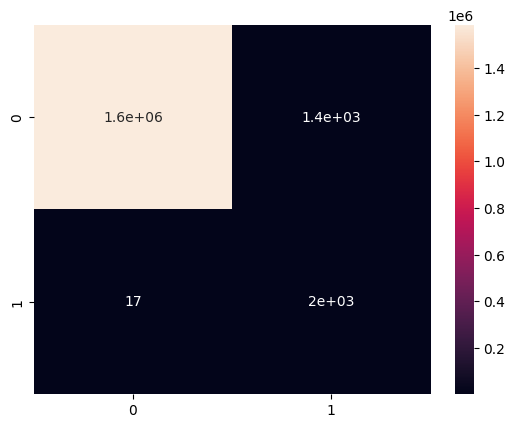

In [117]:
# Adjust the threshold (e.g., set it to 0.5)
threshold = 0.5
y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)


#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

Precision = 0.5793002915451895
Recall = 0.9915169660678643
F1-Score = 0.7313213102686786
ROC-AUC = 0.9994791790678944


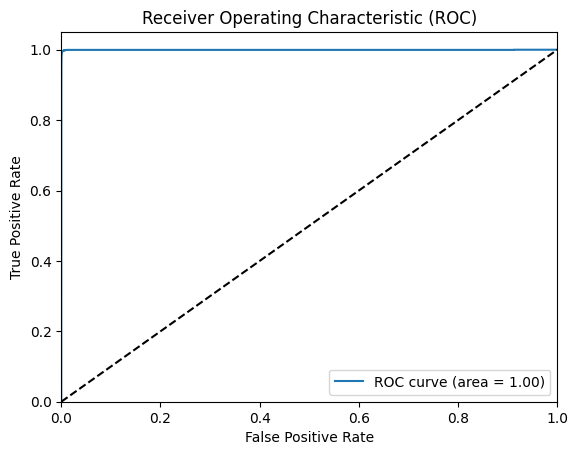

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("ROC-AUC =", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


          Feature  Importance
3  newbalanceOrig    0.757603
0            type    0.119937
2   oldbalanceOrg    0.067441
1          amount    0.029033
5  newbalanceDest    0.020937
4  oldbalanceDest    0.005048


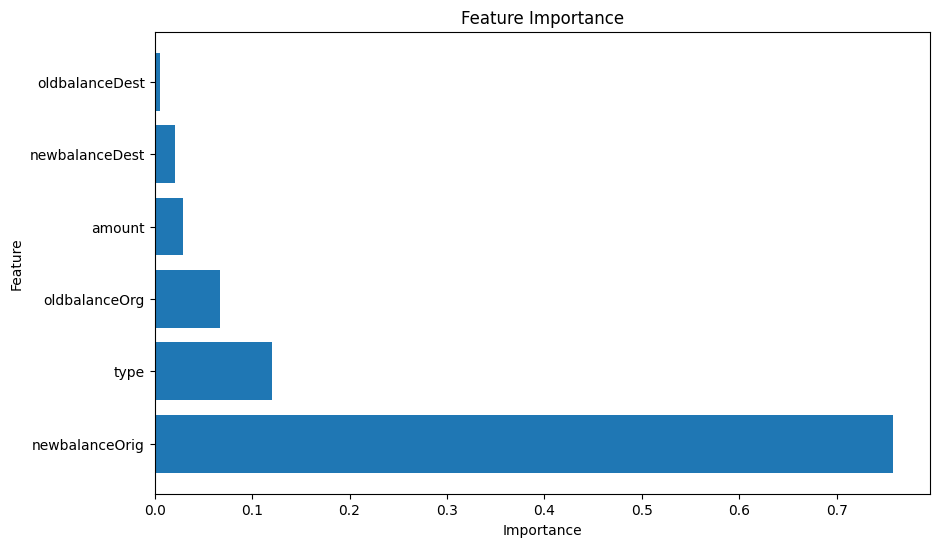

In [119]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [122]:
# Save the trained model to a file
model.save_model('fraud_detection_model.xgb')

# Finding Optimal Thershold

In the context of our project, the traditional accuracy metric might not provide a complete picture of our model's performance due to the imbalanced nature of the dataset, where the ratio between fraudulent and non-fraudulent transactions is substantial. As a result, I'm placing greater emphasis on the metric of recall. Our primary goal is to maximize the detection of fraudulent transactions, even if it means potentially classifying some legitimate transactions as fraudulent.

By focusing on recall, we aim to ensure that the model identifies as many actual fraudulent transactions as possible, minimizing the chances of false negatives. This approach aligns with the company's objective of effectively catching fraudulent activities, even if it results in a slightly higher number of false positives.

To achieve this, I've experimented with adjusting the threshold for classification. By fine-tuning the threshold, we can control the trade-off between recall, precision, and other F1-score metrics. This adjustment enables us to identify the optimal threshold that strikes the right balance between capturing fraudulent transactions and minimizing the impact on genuine transactions.

### Beyond the Familiar Metrics" - A Symphony of Trade-offs:
Imagine each transaction as a small puzzle piece, and we hold the key to fitting them together. But here's the twist – every time we label a piece as 'fraud' or 'not fraud,' it costs our company. If we label a real fraud as 'not fraud,' it sets us back by a whopping 1000 rupees. On the flip side, if we mistakenly label a regular transaction as 'fraud,' it's a more manageable 100 rupees. Our challenge? Find the best way to spend our money to catch the real bad guys while avoiding costly mistakes.

### Finding the Sweet Spot:
Picture a see-saw. On one side, we have accurate fraud detection; on the other, we want to save money. The key is to find the perfect balance. We can adjust a special knob called the 'threshold' to make the see-saw tilt just right. By doing this, we decide when to call something 'fraud' and when to say it's not. Our goal? Spend our money wisely to catch the most fraud without wasting too much on mistakes.


after iterating to all threshold values we can pick the right one where we are getting less Total Cost.

### Test for standard=0.5 case

In [123]:
import xgboost as xgb
import numpy as np

# Load the trained model from a file
loaded_model = xgb.Booster()
loaded_model.load_model('fraud_detection_model.xgb')

# Convert the test data to a DMatrix
dtest = xgb.DMatrix(X_test)

# Make probability predictions using the loaded model
prob_predictions = loaded_model.predict(dtest)

# Define the threshold value
threshold = 0.5

# Define the cost values based on business context
cost_false_positive = 100  # Cost of a false positive (classifying a genuine transaction as fraud)
cost_false_negative = 1000  # Cost of a false negative (missing a fraudulent transaction)

y_pred = (prob_predictions > threshold).astype(int)

# Calculate the number of true positives, false positives, true negatives, and false negatives
tp = np.sum((y_test == 1) & (y_pred == 1))
fp = np.sum((y_test == 0) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fn = np.sum((y_test == 1) & (y_pred == 0))

# Calculate the total cost based on the chosen threshold
total_cost = (fp * cost_false_positive) + (fn * cost_false_negative)

# Print the results
print("Business Impact Analysis at Threshold =", threshold)
print("Total Cost =", total_cost)
print("False Positives =", fp)
print("False Negatives =", fn)
print("True Positives =", tp)
print("True Negatives =", tn)



Business Impact Analysis at Threshold = 0.5
Total Cost = 161300
False Positives = 1443
False Negatives = 17
True Positives = 1987
True Negatives = 1587208


### Performing Iteration

In [125]:

# Define a range of threshold values to test with a 0.01 gap
thresholds = np.arange(0, 1.01, 0.01)

# Initialize variables to store the optimal threshold and results
optimal_threshold = None
min_total_cost = float('inf')
min_fp = None
min_fn = None

# Iterate through threshold values and calculate costs
for threshold in thresholds:
    y_pred_classified = (prob_predictions > threshold).astype(int)
    fp = np.sum((y_test == 0) & (y_pred_classified == 1))
    fn = np.sum((y_test == 1) & (y_pred_classified == 0))
    total_cost = (fp * cost_false_positive) + (fn * cost_false_negative)

    if total_cost < min_total_cost:
        min_total_cost = total_cost
        optimal_threshold = threshold
        min_fp = fp
        min_fn = fn

# Print the results
print("Optimal Threshold =", optimal_threshold)
print("Total Cost =", min_total_cost)
print("False Positives =", min_fp)
print("False Negatives =", min_fn)


##finally minimum cost required for the company is 119500 as of now using this algorithm and 49 False Negatives

Optimal Threshold = 0.9400000000000001
Total Cost = 115300
False Positives = 723
False Negatives = 43


# Feature Analysis

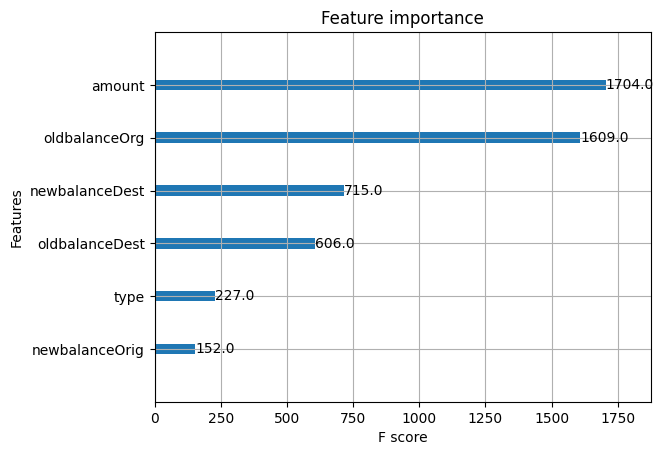

In [126]:
##so 0.96 is the best threshold to minimize the Total cost of the bank

import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(loaded_model)
plt.show()



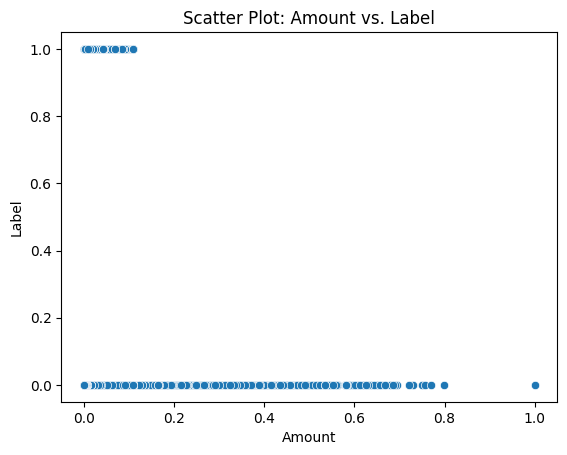

In [127]:
import seaborn as sns

# Create a scatter plot to analyze the relationship between 'amount' and 'Label'
sns.scatterplot(data=data, x='amount', y='Label')
plt.xlabel('Amount')
plt.ylabel('Label')
plt.title('Scatter Plot: Amount vs. Label')
plt.show()


# Applying Boruta Algorithm for feature Selection

In [ ]:
import numpy as np
feature_names = X.columns  #Convert dtype string?

"""
Create shadow features – random features and shuffle values in columns
Train Random Forest / XGBoost and calculate feature importance via mean decrease impurity
Check if real features have higher importance compared to shadow features
Repeat this for every iteration
If original feature performed better, then mark it as important
"""

from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)
print(y_train.shape)
print(X_train.shape)
X_train=np.array(X_train)
y_train=np.array(y_train)
# find all relevant features
feat_selector.fit(X_train,y_train)


# check selected features
print(feat_selector.support_)  #Should we accept the feature

# check ranking of features
print(feat_selector.ranking_) #Rank 1 is the best

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)  #Apply feature selection and return transformed data

"""
Review the features
"""
# zip feature names, ranks, and decisions
feature_ranks = list(zip(feature_names,
                         feat_selector.ranking_,
                         feat_selector.support_))

# print the results
for feat in feature_ranks:
    print('Feature: {:<36} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))


############################################################
#Now use the subset of features to fit XGBoost model on training data
import xgboost as xgb

# Calculate the ratio of negative (non-fraudulent) to positive (fraudulent) class instances
class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = xgb.XGBClassifier(scale_pos_weight=class_ratio)

xgb_model.fit(X_filtered, y_train)

#Now predict on test data using the trained model.

#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_xgb = xgb_model.predict(X_test_filtered)


#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_xgb))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_xgb)
#print(cm)
sns.heatmap(cm, annot=True)


(4771965,)
(4771965, 6)
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Reject

## PCA Analysis.......................

Text(0, 0.5, 'Cum variance')

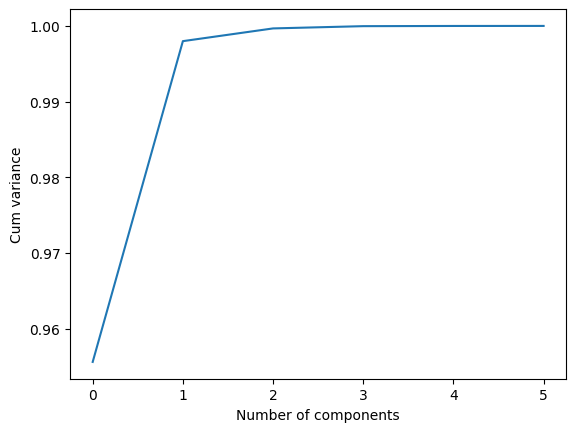

In [128]:
from sklearn.decomposition import PCA

pca_test=PCA(n_components=6)
pca_test.fit(X)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [132]:
n_PCA_components=4
pca=PCA(n_components=n_PCA_components)
principalComponents=pca.fit_transform(X)

In [134]:
principalDf =pd.DataFrame(data=principalComponents,columns=['pc1','pc2','pc3','pc4'])

principalDf['Label'] = data['Label']

finalDf=principalDf

In [135]:
print(finalDf.columns)
print(finalDf.shape)

Index(['pc1', 'pc2', 'pc3', 'pc4', 'Label'], dtype='object')
(6362620, 5)


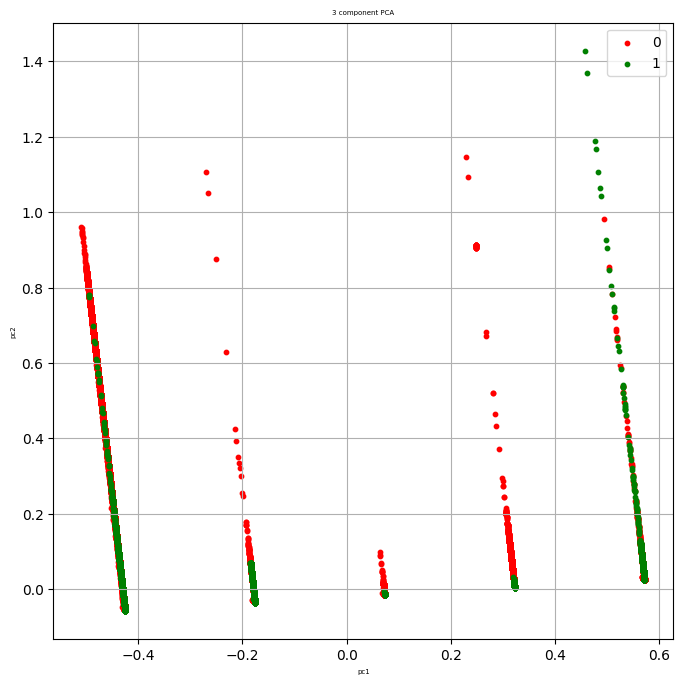

In [137]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('pc1',fontsize=5)
ax.set_ylabel('pc2',fontsize=5)
ax.set_title('3 component PCA',fontsize=5)
labels=[0,1]
colors=['r','g']
for label,color in zip(labels,colors):
    indicesToKeep = finalDf['Label']  == label

    ax.scatter(finalDf.loc[indicesToKeep,'pc1']
              , finalDf.loc[indicesToKeep,'pc2']
              ,c=color
              ,s=10)

ax.legend(labels)  # Use the variable 'labels' containing your label values

ax.grid()

final_X=finalDf.drop(labels=['Label'],axis=1)

In [138]:
finaly=finalDf['Label'].values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
final_Y=labelencoder.fit_transform(finaly)

In [139]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(final_X, final_Y, test_size=0.25, random_state=42)

In [140]:
# fit model to XGBOOST
import xgboost as xgb


# Calculate the ratio of negative (non-fraudulent) to positive (fraudulent) class instances
class_ratio = len(y_train_pca[y_train_pca == 0]) / len(y_train_pca[y_train_pca == 1])

# Initialize the XGBoost classifier with custom hyperparameters
model = xgb.XGBClassifier(
    learning_rate=0.3,   # Default: 0.3
    n_estimators=100,    # Default: 100
    max_depth=6,         # Default: 6
    min_child_weight=1,  # Default: 1
    gamma=0,             # Default: 0
    subsample=1,         # Default: 1
    colsample_bytree=1,  # Default: 1
    scale_pos_weight=class_ratio
)

# Fit the XGBoost model to the training data
model.fit(X_train_pca, y_train_pca)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy =  91.73057639777325 %


<Axes: >

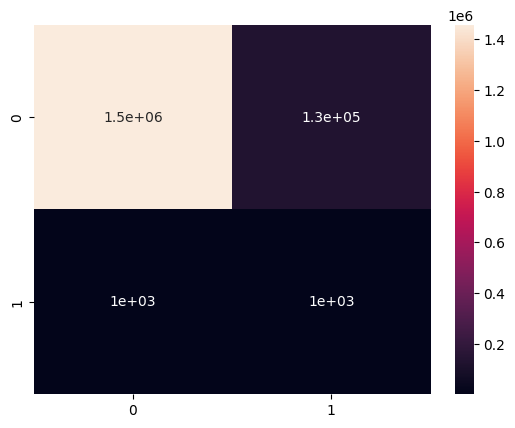

In [141]:
# Adjust the threshold (e.g., set it to 0.5)
threshold = 0.5
y_pred = (model.predict_proba(X_test_pca)[:, 1] > threshold).astype(int)


#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_pca, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pca, y_pred)

sns.heatmap(cm, annot=True)

## Amlost 90% Accuracy was contributed by 3 pca's

In [ ]:
##after performing the Boruta algorithm we can use PCA may give better results then this

# Feature Engineering

I am planning to take 8000 each data points from both classes and perform analysis for that and also use simple neural Network for the Classification....

<Axes: xlabel='Label', ylabel='count'>

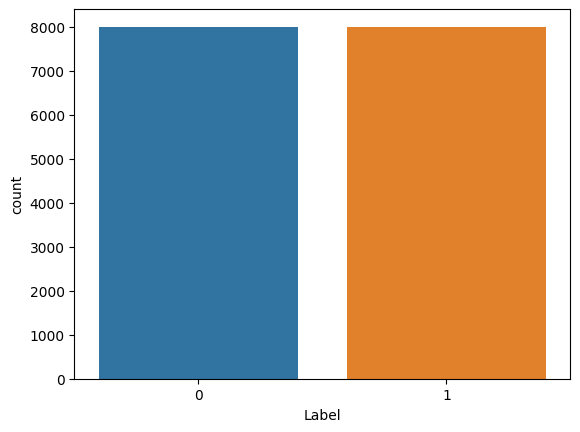

In [142]:

# Extract balanced subset of 8000 samples from each class
fraud_samples = data[data['Label'] == 1].sample(n=8000, random_state=42)
non_fraud_samples = data[data['Label'] == 0].sample(n=8000, random_state=42)
balanced_data = pd.concat([fraud_samples, non_fraud_samples])

# Save the balanced data to a new CSV file named 'Balanced_Processed_Data.csv'
balanced_data.to_csv('Balanced_Processed_Data.csv', index=False)

# Display a count plot of the 'Label' column for the balanced data
sns.countplot(x='Label', data=balanced_data)


In [143]:
import plotly.express as px
condition = ["No Fraud","Fraud"]

have_or_not = balanced_data["Label"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = balanced_data["Label"].value_counts(), names = condition, width = 800, height = 400, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether transaction is Fraud or not")
fig.show()

In [144]:
# Assuming combinedTransactions is your DataFrame
selected_columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X1 = balanced_data[selected_columns]
print(X1.shape)
# Get the names of the selected columns
feature_names = X1.columns
y1=balanced_data['Label'].values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y1=labelencoder.fit_transform(y1)
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train_8000, X_test_8000, y_train_8000, y_test_8000 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

(16000, 6)


## XGBoost Model Training

In [145]:
# fit model to XGBOOST
import xgboost as xgb

# Initialize the XGBoost classifier with custom hyperparameters
model = xgb.XGBClassifier()

# Fit the XGBoost model to the training data
model.fit(X_train_8000, y_train_8000)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy =  99.5 %


<Axes: >

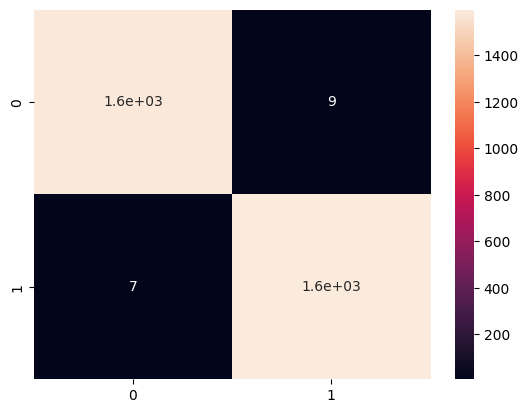

In [146]:
# Adjust the threshold (e.g., set it to 0.5)
threshold = 0.5
y_pred = (model.predict_proba(X_test_8000)[:, 1] > threshold).astype(int)


#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_8000, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_8000, y_pred)

sns.heatmap(cm, annot=True)

Precision = 0.9943960149439601
Recall = 0.9956359102244389
F1-Score = 0.9950155763239876
ROC-AUC = 0.994998406240039


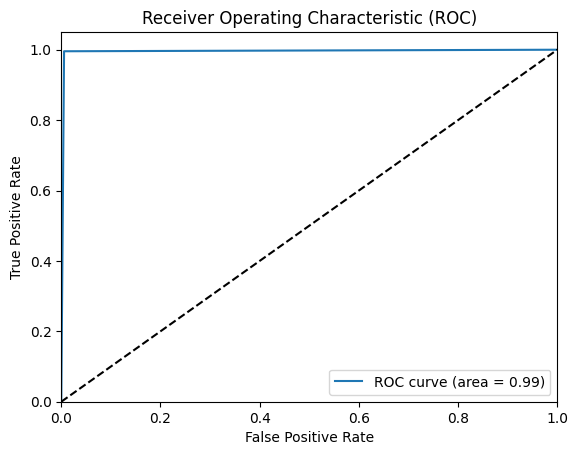

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_8000, y_pred)
recall = recall_score(y_test_8000, y_pred)
f1 = f1_score(y_test_8000, y_pred)

print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test_8000, y_pred)  # Use y_pred directly

print("ROC-AUC =", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_8000, y_pred)  # Use y_pred directly

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

for this 16000 data points (equal sizes of 2 classes)  we getting nice results

we are getting better Precision = 0.9943960149439601
Recall = 0.9956359102244389
F1-Score = 0.9950155763239876
ROC-AUC = 0.994998406240039

# Simple Neural Network Training

In [92]:
from keras.models import Sequential  # Import Sequential class
from keras.layers import Dense,Dropout  # Import Dense layer
from keras.activations import sigmoid
from keras.layers import Activation

model = Sequential()
model.add(Dense(100, input_dim=6, activation='relu'))  # Increase the number of neurons to 100
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))  # Another hidden layer with 100 neurons
model.add(Dropout(0.2))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [93]:
import datetime
start= datetime.datetime.now()

history=model.fit(X_train_8000,y_train_8000,verbose=1,epochs=300,batch_size=32,validation_data=(X_test_8000,y_test_8000))

end=datetime.datetime.now()
print('total execution time is:',end-start)

Epoch 1/300
400/400 [==============================] - 8s 14ms/step - loss: 0.4961 - accuracy: 0.7277 - val_loss: 0.2996 - val_accuracy: 0.8703
Epoch 2/300
400/400 [==============================] - 1s 4ms/step - loss: 0.3042 - accuracy: 0.8500 - val_loss: 0.2479 - val_accuracy: 0.8850
Epoch 3/300
400/400 [==============================] - 2s 4ms/step - loss: 0.2672 - accuracy: 0.8719 - val_loss: 0.2671 - val_accuracy: 0.8788
Epoch 4/300
400/400 [==============================] - 2s 4ms/step - loss: 0.2388 - accuracy: 0.8863 - val_loss: 0.1853 - val_accuracy: 0.9128
Epoch 5/300
400/400 [==============================] - 2s 4ms/step - loss: 0.2213 - accuracy: 0.8970 - val_loss: 0.1984 - val_accuracy: 0.9206
Epoch 6/300
400/400 [==============================] - 2s 4ms/step - loss: 0.2074 - accuracy: 0.9055 - val_loss: 0.1819 - val_accuracy: 0.9097
Epoch 7/300
400/400 [==============================] - 2s 4ms/step - loss: 0.2015 - accuracy: 0.9098 - val_loss: 0.2112 - val_accuracy: 0.898

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               700       
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 200)               20200     
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 60)                6060      
                                                                 
 dense_24 (Dense)            (None, 40)               

In [100]:
_,acc=model.evaluate(X_test_8000,y_test_8000)
print("Accuracy =",(acc * 100.0), "%")

100/100 [==============================] - 1s 8ms/step - loss: 0.0459 - accuracy: 0.9859
Accuracy = 98.59374761581421 %


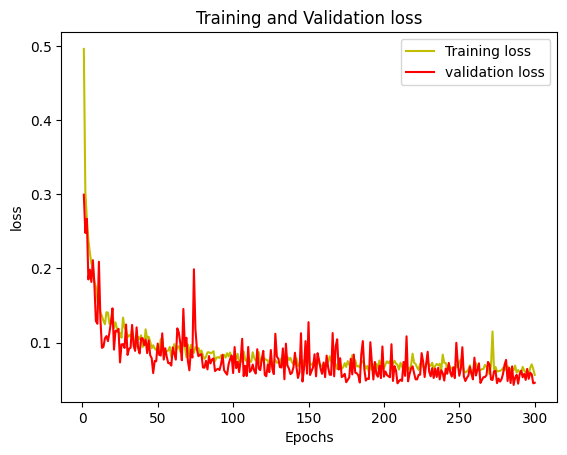

In [101]:
loss=history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1,len(loss) +1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

100/100 [==============================] - 0s 3ms/step


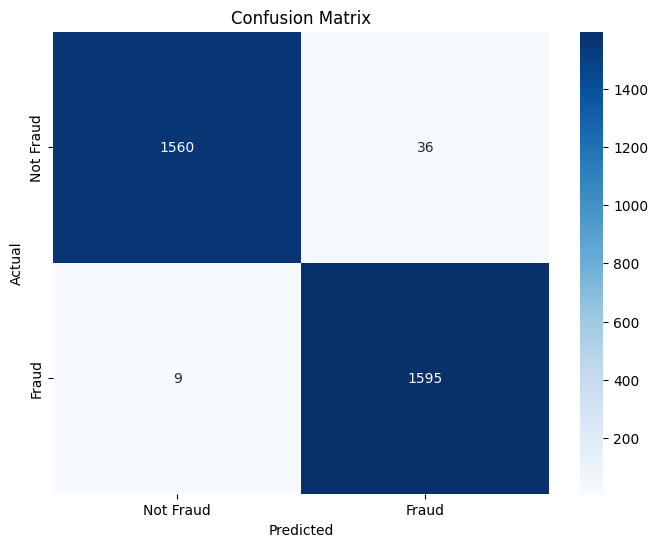

In [106]:
from sklearn.metrics import confusion_matrix

# Predict using the trained model
y_pred = model.predict(X_test_8000)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_8000, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# feature Extraction

we are generating extra 2 features from the data 'oldbalanceOrg_minus_oldbalanceDest', 'newbalanceOrig_minus_newbalanceDest'

<Axes: xlabel='Label', ylabel='count'>

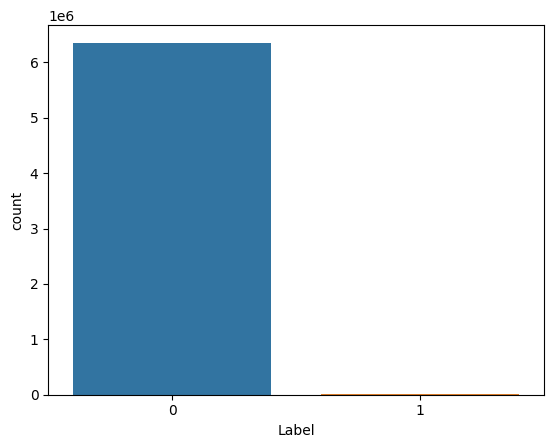

In [160]:
# Load data from a CSV file
data = pd.read_csv('/content/drive/MyDrive/ObjectDetectionByVikas/Fraud.csv')

# Rename 'isFraud' column to 'Label'
data = data.rename(columns={'isFraud': 'Label'})

# Calculate the new columns based on the differences
data['oldbalanceOrg_minus_oldbalanceDest'] = abs(data['oldbalanceOrg'] - data['newbalanceDest'])
data['newbalanceOrig_minus_newbalanceDest'] = abs(data['newbalanceOrig'] - data['oldbalanceDest'])

# Sort data by 'step' variable in ascending order
data = data.sort_values(by='step')

# Replace categorical names with numeric codes in the 'type' column
data['type'] = data['type'].replace(
    {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}
)

# Perform normalization on specific columns
columns_to_normalize = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                        'oldbalanceOrg_minus_oldbalanceDest', 'newbalanceOrig_minus_newbalanceDest']
for col in columns_to_normalize:
    max_value = data[col].max()
    data[col] /= max_value

# Save the processed data to a new CSV file named 'Processed_Data.csv'
data.to_csv('Processed_Data_extraction.csv', index=False)

# Display a count plot of the 'Label' column
sns.countplot(x='Label', data=data)

In [161]:
# Assuming combinedTransactions is your DataFrame
selected_columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','oldbalanceOrg_minus_oldbalanceDest', 'newbalanceOrig_minus_newbalanceDest']
X = data[selected_columns]
print(X.shape)
# Get the names of the selected columns
feature_names = X.columns
print(feature_names)

(6362620, 8)
Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'oldbalanceOrg_minus_oldbalanceDest',
       'newbalanceOrig_minus_newbalanceDest'],
      dtype='object')


In [162]:
y=data['Label'].values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=labelencoder.fit_transform(y)

In [163]:
print(Y)
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

[0 0 0 ... 1 1 1]


In [164]:
# fit model to XGBOOST
import xgboost as xgb


# Calculate the ratio of negative (non-fraudulent) to positive (fraudulent) class instances
class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the XGBoost classifier with custom hyperparameters
model = xgb.XGBClassifier(
    learning_rate=0.3,   # Default: 0.3
    n_estimators=120,    # Default: 100
    max_depth=6,         # Default: 6
    min_child_weight=1,  # Default: 1
    gamma=0,             # Default: 0
    subsample=1,         # Default: 1
    colsample_bytree=1,  # Default: 1
    scale_pos_weight=class_ratio
)

# Fit the XGBoost model to the training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy =  99.88520452266519 %


<Axes: >

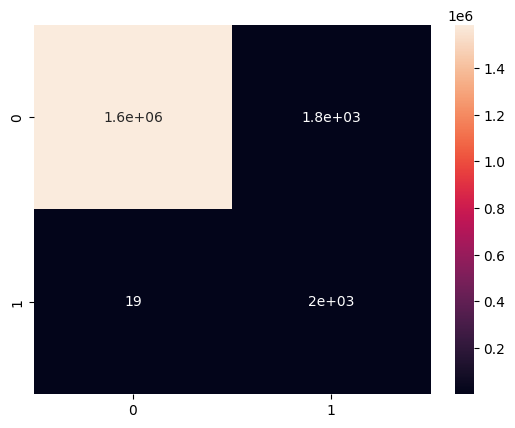

In [165]:
# Adjust the threshold (e.g., set it to 0.5)
threshold = 0.5
y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)


#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

Precision = 0.5234704641350211
Recall = 0.9905189620758483
F1-Score = 0.6849551414768806
ROC-AUC = 0.999413309369593


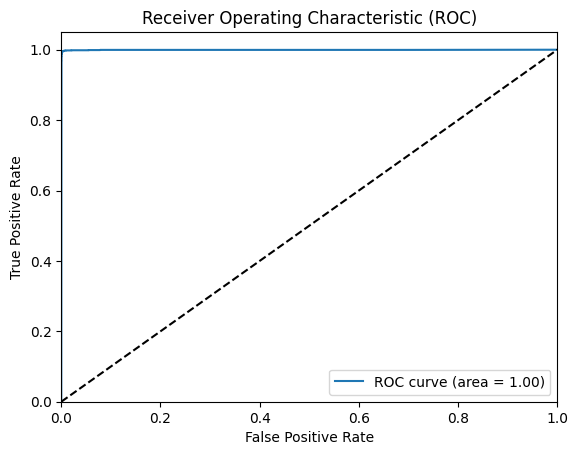

In [166]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("ROC-AUC =", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [167]:
# Save the trained model to a file
model.save_model('fraud_detection_extraction_model.xgb')

In [168]:
import xgboost as xgb
import numpy as np

# Load the trained model from a file
loaded_model = xgb.Booster()
loaded_model.load_model('fraud_detection_extraction_model.xgb')

# Convert the test data to a DMatrix
dtest = xgb.DMatrix(X_test)

# Make probability predictions using the loaded model
prob_predictions = loaded_model.predict(dtest)

# Define the cost values based on business context
cost_false_positive = 100  # Cost of a false positive (classifying a genuine transaction as fraud)
cost_false_negative = 1000  # Cost of a false negative (missing a fraudulent transaction)

y_pred = (prob_predictions > threshold).astype(int)


# Define a range of threshold values to test with a 0.01 gap
thresholds = np.arange(0, 1.01, 0.01)

# Initialize variables to store the optimal threshold and results
optimal_threshold = None
min_total_cost = float('inf')
min_fp = None
min_fn = None

# Iterate through threshold values and calculate costs
for threshold in thresholds:
    y_pred_classified = (prob_predictions > threshold).astype(int)
    fp = np.sum((y_test == 0) & (y_pred_classified == 1))
    fn = np.sum((y_test == 1) & (y_pred_classified == 0))
    total_cost = (fp * cost_false_positive) + (fn * cost_false_negative)

    if total_cost < min_total_cost:
        min_total_cost = total_cost
        optimal_threshold = threshold
        min_fp = fp
        min_fn = fn

# Print the results
print("Optimal Threshold =", optimal_threshold)
print("Total Cost =", min_total_cost)
print("False Positives =", min_fp)
print("False Negatives =", min_fn)



Optimal Threshold = 0.9400000000000001
Total Cost = 128500
False Positives = 675
False Negatives = 61


## trying to extract new features from the data is not working well so some data sampling methods and data augmentation methods may hepfull to the application.